In [1]:
import astropy.io.fits
import matplotlib
import pylab as pl
import aplpy
import numpy
import astropy
import astropy.wcs
import astropy.coordinates
from astropy.units import *
from astropy.io import fits
from astropy.wcs import WCS
import warnings;warnings.filterwarnings('ignore')
#from tqdm import tqdm
from astropy.units import deg
from astropy.units import km
from astropy.units import s

In [2]:
#datapath
data = '/Users/r.yamada/science/NGC2023_12CO_merge.fits'
data2 = '/Users/r.yamada/science/NGC2023_13CO_Tmb_headerchange.fits'
hdu1 = astropy.io.fits.open(data)[0]
hdu2 = astropy.io.fits.open(data2)[0]

In [3]:
#header fix
hdu1.header['CTYPE2'] = 'GLAT    '
hdu1.header['CTYPE1'] = 'GLON    '

INFO: Auto-setting vmin to -2.867e+00 [aplpy.core]
INFO: Auto-setting vmax to  3.352e+01 [aplpy.core]


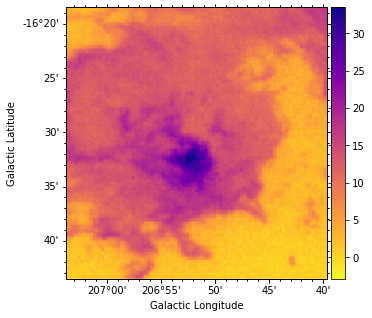

In [4]:
hdu1.header["BUNIT"] = 'K m/s   '
hdu1.header["CTYPE3"] = 'm/s     '
#del hdu1.header['CROTA2']
#del hdu1.header['CROTA3']
#WCS(hdu1.header)
f = aplpy.FITSFigure(hdu1, slices=[365], figsize=(5,5))
f.show_colorscale(cmap = 'plasma_r')
f.add_colorbar()

In [5]:
#calc RMS

#print(hdu1.data[:, :, 5])
squer = numpy.power(hdu1.data[:, :, 2],2)
rms = numpy.sqrt(numpy.mean(squer))
print(numpy.mean(squer))
print(rms)

1.8718836
1.368168


In [6]:
#contour on image
newdata = hdu1.data[365, :, :]
hdr = hdu1.header
try:
    del hdr["CRVAL3"]
except:
    pass
try:
    del hdr["CRPIX3"]
except:
    pass
try:
    del hdr["CRVAL3"]
except:
    pass
try:
    del hdr["CDELT3"]
except:
    pass
try:
    del hdr["CUNIT3"]
except:
    pass
try:
    del hdr["CTYPE3"]
except:
    pass
try:
    del hdr["CROTA3"]
except:
    pass
try:
    del hdr["NAXIS3"]
except:
    pass
try:
    hdr["NAXIS"] = 2
except:
    pass
try:
    del hdr["WCSAXES"]
except:
    pass
hdr["NAXIS"] = 2


hdu_new= fits.PrimaryHDU(newdata, hdr)
print(hdu_new.header)
print(hdu_new.data.shape)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  193                                                  NAXIS2  =                  201                                                  OBJECT  = 'ori23             '                                                  TELESCOP= 'NRO45M            '                                                  INSTRUME= 'TMULTH            '                                                  OBSERVER= 'cu128hs           '                                                  DATE-OBS= '2018-01-14        '                                                  BUNIT   = 'K m/s   '                                                            EPOCH   =    0.20000000000E+04                                                  OBSRA   =    8.54213085355E+01          

In [7]:
# colorbar の max / min
vmax = 30
vmin = 0.
def plot(hdu):

    fig = aplpy.FITSFigure(hdu, convention='wells')

    # colorbar configuration.
    fig.show_colorscale(vmin=vmin, vmax=vmax, stretch='linear', cmap='coolwarm', aspect='equal')
    fig.add_colorbar()
    fig.colorbar.show()
    colorbar_width = 0.2
    fig.colorbar.set_width(colorbar_width)
    fig.colorbar.set_font(size=12, family='helvetica')
    fig.colorbar.set_axis_label_text('km s$^{-1}$')
    fig.colorbar.set_axis_label_font(size=12, family='helvetica')

    # grid configuration.
    grid_interval = 0.4 # deg.
    grid_freq = 5.
    fig.ticks.set_color('k')
    fig.ticks.set_xspacing(grid_interval)
    fig.ticks.set_yspacing(grid_interval)
    fig.ticks.set_length(5, minor_factor=0.5) # points
    fig.ticks.set_linewidth(1.5) # points
    #fig.ticks.set_minor_frequency(grid_freq)

    #  label configuration.
    fig.tick_labels.set_xformat('dd.d')
    fig.tick_labels.set_yformat('dd.d')
    fig.tick_labels.set_font(size=12, family='helvetica')
    fig.axis_labels.set_font(size=12, family='helvetica')
    
    plt.show()

In [24]:
#distance-deg conversion
def scalebarlength(distance, pc):
    _distance = distance*3.086e+16 #distance pc-m conversion
    _pc = pc*3.086e+16
    angle = numpy.arcsin((1/2)*_pc/_distance)
    return angle

a = scalebarlength(410, 1)

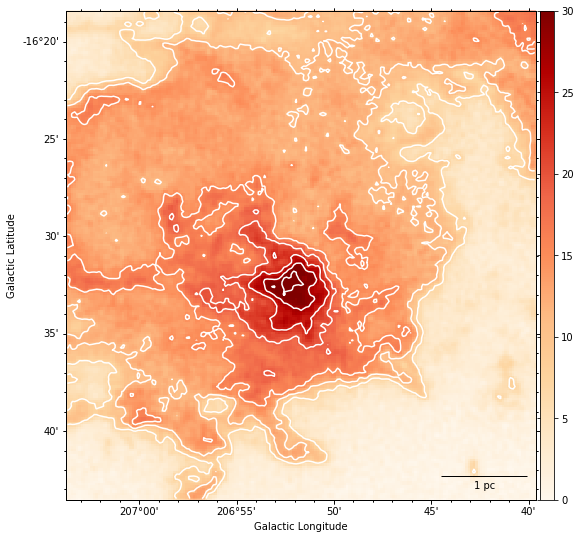

In [25]:
import matplotlib.pyplot as plt
fig = aplpy.FITSFigure(hdu_new, convention='wells')
fig.show_colorscale(vmin=vmin, vmax=vmax, stretch='linear', cmap='OrRd', aspect='equal')
fig.show_contour(levels=numpy.linspace(1,10,10)*rms*3+3, colors='white')
fig.add_scalebar(a*60, '1 pc', color = 'black')
fig.add_colorbar()
